In [132]:
!pip install openpyxl

In [305]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import config

In [306]:
#setting seed
def set_seed():
    
    torch.manual_seed(config.random_seed)
    np.random.seed(config.random_seed)
    random.seed(config.random_seed)
    torch.cuda.manual_seed(config.random_seed)
set_seed()    

<h3>Helper functions to plot</h3>

In [244]:
def plot_graphs(df):
    ax = df.plot.bar(x='Labeled_data', y=['Mcc_sup','Mcc_student','Mcc_teacher'], rot=0,figsize=(10,5))
    plt.title('Experiment for 2000 training data')
    plt.yticks(np.arange(0,0.5,0.02))
    ax.grid(axis='y')
    plt.show()

In [298]:
def plot_with_secondary_axis(df,fig_name):
    ax = df[['Mcc_sup','Mcc_student','Mcc_teacher']].plot(kind='bar',figsize=(10,5),yticks=np.arange(0,0.5,0.02), xlabel = 'labelled data',ylabel = 'mcc score')
    ax2=df['rel_imp_st'].plot(secondary_y=True,color = 'red',label='student_rel_impr')
    ax2=df['rel_imp_te'].plot(secondary_y=True,color= 'black',label='teacher_rel_impr')
    ax.set_xticklabels(df.Labeled_data)
    plt.title('Experiment for 2000 training data')
    plt.legend(loc='upper left')
    ax.grid(axis='y')
    ax2.set_ylabel('relative improvent to sup mcc score')
#     plt.savefig(f'../figures/{fig_name}.png')
    plt.show()

In [154]:
def cal_rel_improvement(row,model):
    
    if model == 'student':
        if row.Mcc_student > row.Mcc_sup:
            temp = row.Mcc_student - row.Mcc_sup
            return round((float(temp/row.Mcc_sup)*100),2)
        else:
            return 0.0
        
    elif model=='teacher':
        
        if row.Mcc_teacher > row.Mcc_sup:
            temp = row.Mcc_teacher - row.Mcc_sup
            return round((float(temp/row.Mcc_sup)*100),2)
        else:
            return 0.0
        

In [322]:

df = pd.read_excel('../data/findings_pseudoLabeling.xlsx', engine='openpyxl')
df=df.rename(columns={"labeledData": "Labeled_data", "mcc_sup": "Mcc_sup","mcc_student":"Mcc_student","mcc_teacher":"Mcc_teacher"})
df=df.iloc[:,:-2]

df_conf_60 = df[df.Confidence==0.6]
df_conf_60['rel_imp_st'] = df_conf_60.apply(lambda row: cal_rel_improvement(row,'student'), axis=1)
df_conf_60['rel_imp_te'] = df_conf_60.apply(lambda row: cal_rel_improvement(row,'teacher'), axis=1)
df_conf_80 = df[df.Confidence==0.8]
df_conf_80['rel_imp_st'] = df_conf_80.apply(lambda row: cal_rel_improvement(row,'student'), axis=1)
df_conf_80['rel_imp_te'] = df_conf_80.apply(lambda row: cal_rel_improvement(row,'teacher'), axis=1)
df_conf_80=df_conf_80.reset_index(drop=True)
df_60_conscost = df_conf_60[df_conf_60.ConstCost=='Y']
df_60_conscost= df_60_conscost.reset_index(drop=True)
df_60_woconscost = df_conf_60[df_conf_60.ConstCost=='N']
df_60_woconscost= df_60_woconscost.reset_index(drop=True)
df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Labeled_data,UnlabelData,Confidence,ConstCost,Mcc_sup,Mcc_student,Mcc_teacher
0,250,1750,0.6,Y,0.250,0.283,0.284
1,250,1750,0.6,N,0.250,0.281,0.282
2,250,1750,0.8,Y,0.250,0.280,0.283
3,500,1500,0.6,Y,0.288,0.286,0.292
4,500,1500,0.6,N,0.288,0.290,0.293
5,500,1500,0.8,Y,0.288,0.287,0.287
6,750,1250,0.6,Y,0.313,0.302,0.306
7,750,1250,0.6,N,0.313,0.298,0.307
8,750,1250,0.8,Y,0.313,0.294,0.302
9,1000,1000,0.6,Y,0.320,0.312,0.314


<h3>PseudoLabeling with Confidence 60 and consistency Cost</h3>

In [216]:
df_60_conscost

,Labeled_data,UnlabelData,Confidence,ConstCost,Mcc_sup,Mcc_student,Mcc_teacher,rel_imp_st,rel_imp_te
0,250,1750,0.6,Y,0.250,0.283,0.284,13.2,13.60
1,500,1500,0.6,Y,0.288,0.286,0.292,0.0,1.39
2,750,1250,0.6,Y,0.313,0.302,0.306,0.0,0.00
3,1000,1000,0.6,Y,0.320,0.312,0.314,0.0,0.00
4,1250,750,0.6,Y,0.335,0.338,0.344,0.9,2.69
5,1500,500,0.6,Y,0.333,0.318,0.332,0.0,0.00
6,1750,250,0.6,Y,0.328,0.324,0.328,0.0,0.00


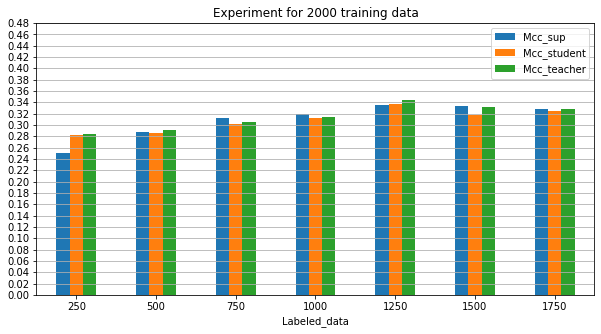

In [245]:
plot_graphs(df_60_conscost)

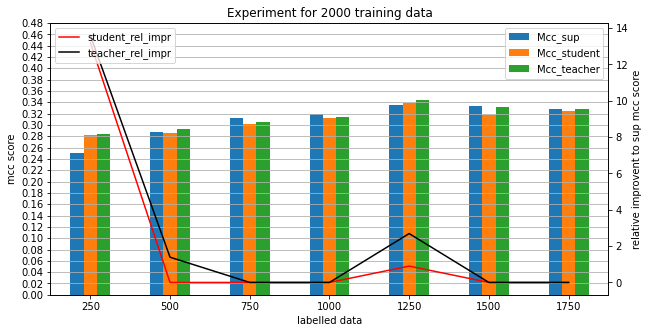

In [299]:
plot_with_secondary_axis(df_60_conscost)

<h3>PseudoLabeling with Confidence 60 and without consistency Cost</h3>

In [219]:
df_60_woconscost

,Labeled_data,UnlabelData,Confidence,ConstCost,Mcc_sup,Mcc_student,Mcc_teacher,rel_imp_st,rel_imp_te
0,250,1750,0.6,N,0.250,0.281,0.282,12.40,12.80
1,500,1500,0.6,N,0.288,0.290,0.293,0.69,1.74
2,750,1250,0.6,N,0.313,0.298,0.307,0.00,0.00
3,1000,1000,0.6,N,0.320,0.307,0.314,0.00,0.00
4,1250,750,0.6,N,0.335,0.337,0.347,0.60,3.58
5,1500,500,0.6,N,0.333,0.318,0.326,0.00,0.00
6,1750,250,0.6,N,0.328,0.325,0.331,0.00,0.91


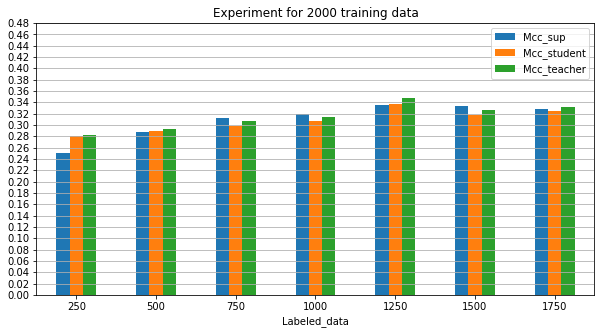

In [246]:
plot_graphs(df_60_woconscost)

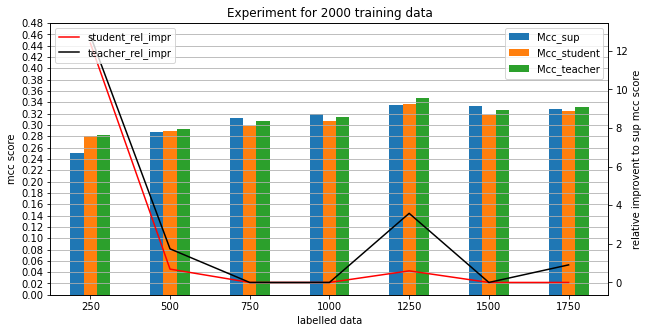

In [292]:
plot_with_secondary_axis(df_60_woconscost) # plot with relative improvement of teacher & student with respect to supervised model

<h3>PseudoLabeling with Confidence 80 and with consistency Cost</h3>

In [222]:
df_conf_80

,Labeled_data,UnlabelData,Confidence,ConstCost,Mcc_sup,Mcc_student,Mcc_teacher,rel_imp_st,rel_imp_te
0,250,1750,0.8,Y,0.250,0.280,0.283,12.0,13.20
1,500,1500,0.8,Y,0.288,0.287,0.287,0.0,0.00
2,750,1250,0.8,Y,0.313,0.294,0.302,0.0,0.00
3,1000,1000,0.8,Y,0.320,0.306,0.310,0.0,0.00
4,1250,750,0.8,Y,0.335,0.335,0.337,0.0,0.60
5,1500,500,0.8,Y,0.333,0.314,0.331,0.0,0.00
6,1500,500,0.8,N,0.333,0.314,0.328,0.0,0.00
7,1750,250,0.8,Y,0.328,0.327,0.332,0.0,1.22


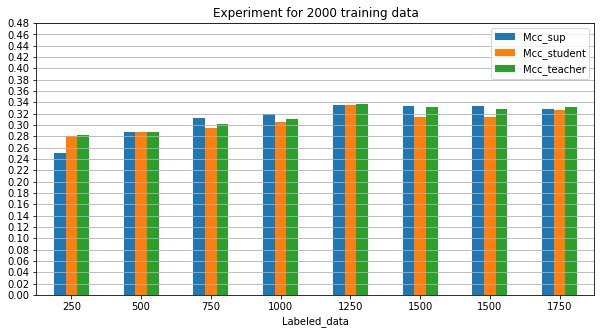

In [248]:
plot_graphs(df_conf_80)

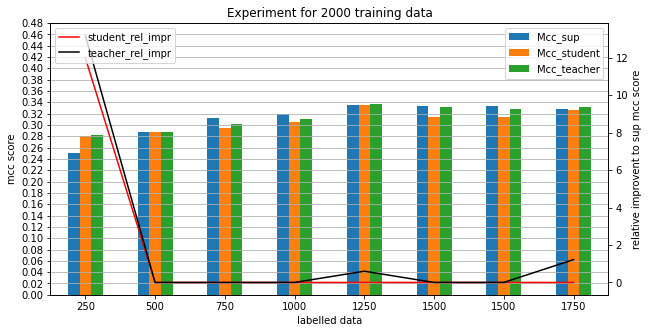

In [293]:
plot_with_secondary_axis(df_conf_80) # plot with relative improvement of teacher & student with respect to supervised model

<h3> Mean Teacher plots </h3>

In [324]:
# !pip install openpyxl
df = pd.read_excel('../data/findings.xlsx', engine='openpyxl')
df_099 = df[df.alpha==0.99]
df_0995 = df[df.alpha==0.995]
# df_099
df_099['rel_imp_st'] = df_099.apply(lambda row: cal_rel_improvement(row,'student'), axis=1)
df_099['rel_imp_te'] = df_099.apply(lambda row: cal_rel_improvement(row,'teacher'), axis=1)
df_0995['rel_imp_st'] = df_0995.apply(lambda row: cal_rel_improvement(row,'student'), axis=1)
df_0995['rel_imp_te'] = df_0995.apply(lambda row: cal_rel_improvement(row,'teacher'), axis=1)
df_0995=df_0995.reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [325]:
df

,Labeled_data,Unlabeled_data,alpha,Mcc_sup,Mcc_student,Mcc_teacher
0,250,1750,0.990,0.252,0.280,0.283
1,500,1500,0.990,0.288,0.299,0.300
2,750,1250,0.990,0.313,0.317,0.312
3,1000,1000,0.990,0.320,0.344,0.346
4,1250,750,0.990,0.335,0.340,0.344
5,1500,500,0.990,0.333,0.350,0.350
6,1750,250,0.990,0.328,0.355,0.361
7,250,1750,0.995,0.252,0.271,0.277
8,500,1500,0.995,0.288,0.298,0.296
9,750,1250,0.995,0.313,0.316,0.315


<h3> Mean Teacher for alpha value 0.99 </h3>
Alpha is smoothing coeficient that controls the amount of teacher's weight in exponential moving average

In [226]:
df_099 # print findings of mean teacher with alpha value 0.99 

,Labeled_data,Unlabeled_data,alpha,Mcc_sup,Mcc_student,Mcc_teacher,rel_imp_st,rel_imp_te
0,250,1750,0.99,0.252,0.280,0.283,11.11,12.30
1,500,1500,0.99,0.288,0.299,0.300,3.82,4.17
2,750,1250,0.99,0.313,0.317,0.312,1.28,0.00
3,1000,1000,0.99,0.320,0.344,0.346,7.50,8.13
4,1250,750,0.99,0.335,0.340,0.344,1.49,2.69
5,1500,500,0.99,0.333,0.350,0.350,5.11,5.11
6,1750,250,0.99,0.328,0.355,0.361,8.23,10.06


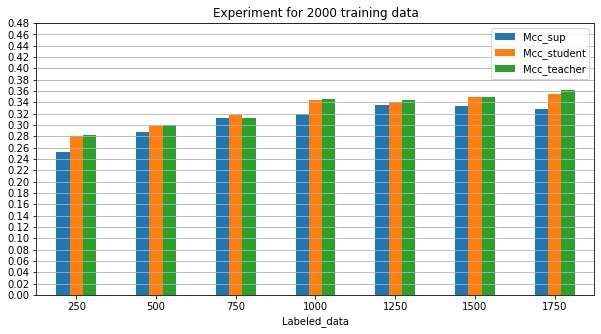

In [255]:
plot_graphs(df_099)

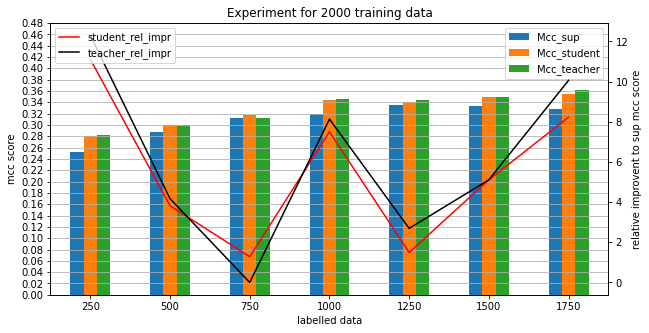

In [294]:
plot_with_secondary_axis(df_099) # plot with improvement on secondary axis

<h3> Mean Teacher for alpha value 0.995 </h3>

In [295]:
df_0995 # print findings of mean teacher with alpha value 0.99 

,Labeled_data,Unlabeled_data,alpha,Mcc_sup,Mcc_student,Mcc_teacher,rel_imp_st,rel_imp_te
0,250,1750,0.995,0.252,0.271,0.277,7.54,9.92
1,500,1500,0.995,0.288,0.298,0.296,3.47,2.78
2,750,1250,0.995,0.313,0.316,0.315,0.96,0.64
3,1000,1000,0.995,0.320,0.335,0.325,4.69,1.56
4,1250,750,0.995,0.335,0.334,0.335,0.00,0.00
5,1500,500,0.995,0.333,0.350,0.348,5.11,4.50
6,1750,250,0.995,0.328,0.350,0.356,6.71,8.54


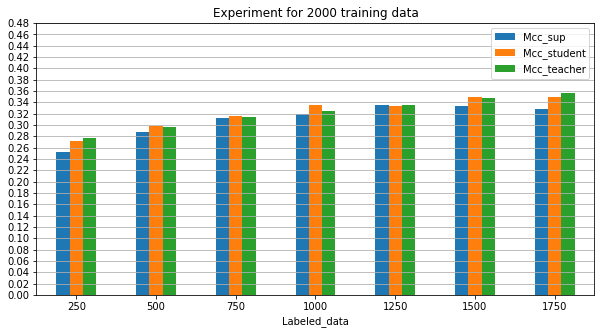

In [296]:
plot_graphs(df_0995)

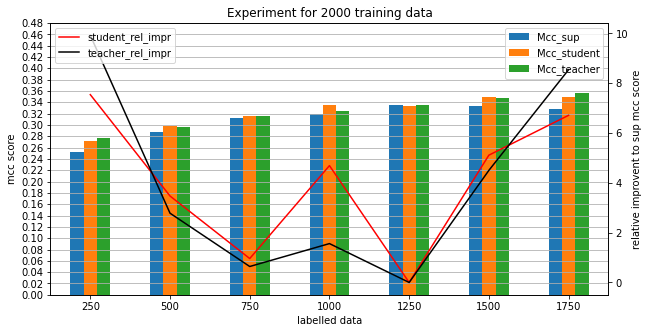

In [297]:
plot_with_secondary_axis(df_0995)# plot with improvement on secondary axis

In [300]:
# ax =
# # df.plot(x="Labeled_data", y="Mcc_student", kind="bar", ax=ax, color="C2")

#  df.plot(x="Labeled_data", y="Mcc_sup", kind="bar")
# plt.show()

In [11]:
# import data_utils
# data_utils = reload(data_utils)
# from data_utils import loadDatafromFile,createTokenizedDf,CompDataset,createkfoldData,createDataloaders
# config = reload(config)

In [12]:
# config= reload(config)